In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels

df = pd.read_excel('/Users/apple/Downloads/Imperial/Grey_Epoch_task/data/Data_Task.xlsx', engine = 'openpyxl', index_col='datetime')
df = pd.DataFrame(df)

In [2]:
def sin_positioning(variable, units):

    variable = np.sin(2*np.pi *variable/units)
    return variable

df['quarter_number'] = sin_positioning(df['quarter_number'], 4)
df['month_number'] = sin_positioning(df['month_number'], 12)
df['week_number'] = sin_positioning(df['week_number'], 52)
df['day_number'] = sin_positioning(df['day_number'], 7)
df['hour'] = sin_positioning(df['hour'], 24)

In [3]:
def myRMSE(preds, target):

    return np.sqrt(np.mean((preds - target)**2))

In [4]:
df_lite = df.iloc[:, np.r_[1:25, 47:52]]
df_lite.columns

Index(['quarter_number', 'month_number', 'week_number', 'day_number', 'hour',
       'DE load', 'DE_biomass', 'DE_fossil brown coal/lignite',
       'DE_fossil coal-derived gas', 'DE_fossil gas', 'DE_fossil hard coal',
       'DE_fossil oil', 'DE_geothermal', 'DE_hydro pumped storage',
       'DE_hydro run-of-river and poundage', 'DE_hydro water reservoir',
       'DE_nuclear', 'DE_other', 'DE_other renewable', 'DE_solar', 'DE_waste',
       'DE_wind offshore', 'DE_wind onshore', 'DE_hydro_pump_cons',
       'TZT1 Comdty', 'MODEC1 Comdty', 'API21MON Comdty', 'EURUSD Curncy',
       'DE-LU spot prices'],
      dtype='object')

In [5]:
df_lite_train = df_lite.loc[: '2023-12-31']
df_lite_test = df_lite.loc['2024-01-01':]
df_lite_train

,quarter_number,month_number,week_number,day_number,hour,DE load,DE_biomass,DE_fossil brown coal/lignite,DE_fossil coal-derived gas,DE_fossil gas,...,DE_solar,DE_waste,DE_wind offshore,DE_wind onshore,DE_hydro_pump_cons,TZT1 Comdty,MODEC1 Comdty,API21MON Comdty,EURUSD Curncy,DE-LU spot prices
datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1.000000e+00,5.000000e-01,6.432491e-16,-2.449294e-16,2.588190e-01,38931.53,4365.08,3859.60,0.0,1721.95,...,1.24,735.25,3059.09,28710.55,-1933.44,76.315,83.97,191.0,1.0705,-5.17
2023-01-01 01:00:00,1.000000e+00,5.000000e-01,6.432491e-16,-2.449294e-16,5.000000e-01,38314.28,4344.81,3866.37,0.0,1568.00,...,1.12,725.10,3586.26,29305.17,-2025.52,76.315,83.97,191.0,1.0705,-1.07
2023-01-01 02:00:00,1.000000e+00,5.000000e-01,6.432491e-16,-2.449294e-16,7.071068e-01,37470.18,4333.13,3860.14,0.0,1571.53,...,1.25,718.67,3842.28,29265.97,-3636.71,76.315,83.97,191.0,1.0705,-1.47
2023-01-01 03:00:00,1.000000e+00,5.000000e-01,6.432491e-16,-2.449294e-16,8.660254e-01,36497.71,4338.73,3864.61,0.0,1564.86,...,1.22,718.84,3463.05,27008.65,-4385.64,76.315,83.97,191.0,1.0705,-5.08
2023-01-01 04:00:00,1.000000e+00,5.000000e-01,6.432491e-16,-2.449294e-16,9.659258e-01,36064.98,4353.16,3840.83,0.0,1550.68,...,1.59,721.33,3462.19,26438.64,-4411.57,76.315,83.97,191.0,1.0705,-4.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,-2.449294e-16,-2.449294e-16,6.432491e-16,-2.449294e-16,-8.660254e-01,50755.28,4500.71,3406.30,0.0,2812.61,...,2.38,770.78,6326.49,29145.08,-637.84,32.350,80.37,108.1,1.1039,9.00
2023-12-31 20:00:00,-2.449294e-16,-2.449294e-16,6.432491e-16,-2.449294e-16,-7.071068e-01,47564.91,4417.21,3368.65,0.0,2722.61,...,2.21,779.39,6305.27,29925.76,-1155.53,32.350,80.37,108.1,1.1039,7.95
2023-12-31 21:00:00,-2.449294e-16,-2.449294e-16,6.432491e-16,-2.449294e-16,-5.000000e-01,45694.80,4345.39,3373.94,0.0,2675.59,...,2.19,775.86,6361.00,29695.15,-1289.10,32.350,80.37,108.1,1.1039,6.00


In [ ]:
corr_cols = ['DE load', 'DE_wind offshore', 'DE_wind onshore', 'DE_solar']
corrwith_cols = [col for col in df_lite.columns if col not in corr_cols][5:-6]

corr_matrix = df_lite_train.corr().loc[corrwith_cols, corr_cols]
corr_matrix

,DE load,DE_wind offshore,DE_wind onshore,DE_solar
DE_biomass,0.404313,0.111640,0.097778,-0.299913
DE_fossil brown coal/lignite,0.423339,-0.202931,-0.399307,-0.272426
DE_fossil coal-derived gas,NaN,NaN,NaN,NaN
DE_fossil gas,0.512359,-0.221850,-0.350108,-0.244110
DE_fossil hard coal,0.548268,-0.100011,-0.142095,-0.240264
DE_fossil oil,0.177182,-0.029992,-0.015735,0.052470
DE_geothermal,0.119074,0.212571,0.243617,-0.376377
DE_hydro pumped storage,0.332815,-0.008874,-0.048189,-0.266951
DE_hydro run-of-river and poundage,-0.166119,-0.238226,-0.248761,0.247066
DE_hydro water reservoir,0.120573,-0.241591,-0.296026,0.021697


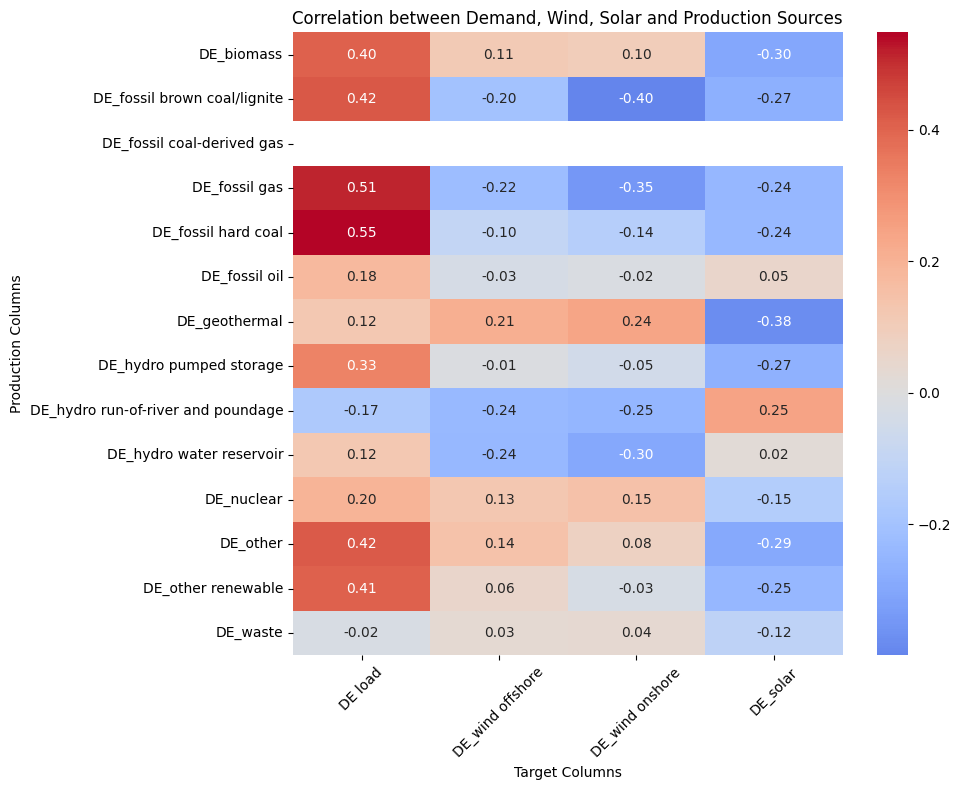

In [7]:
plt.figure(figsize=(10, 8))  # Optional: adjust size based on your table
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation between Demand, Wind, Solar and Production Sources")
plt.ylabel("Production Columns")
plt.xlabel("Target Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

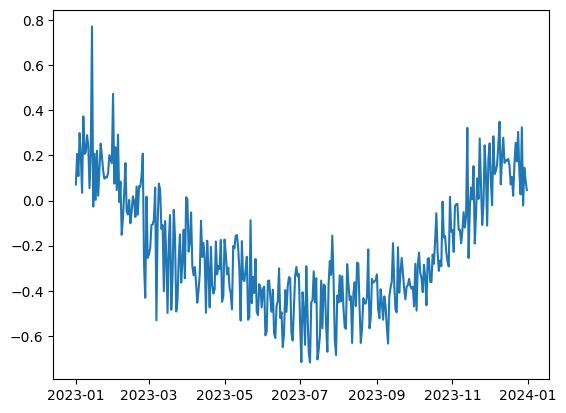

In [8]:
def get_pair_daily_corr(input, target):

    corr_list = []

    for day in range(365):

        day_corr = input.iloc[day*24: (day+1)*24].corr(target.iloc[day*24: (day+1)*24])
        #print(day_corr)
        corr_list.append(day_corr)

    plt.plot(np.unique(df_lite_train.index.date), corr_list)


DE_solar = df_lite_train.DE_solar
DE_biomass = df_lite_train.DE_biomass
get_pair_daily_corr(DE_solar,DE_biomass)

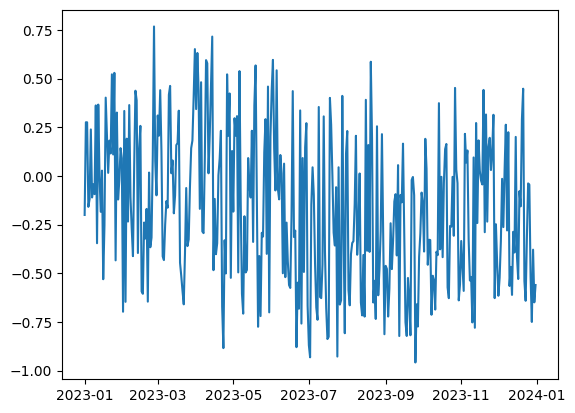

In [9]:
DE_solar = df_lite_train.DE_solar
DE_waste = df_lite_train.DE_waste
get_pair_daily_corr(DE_solar,DE_waste)

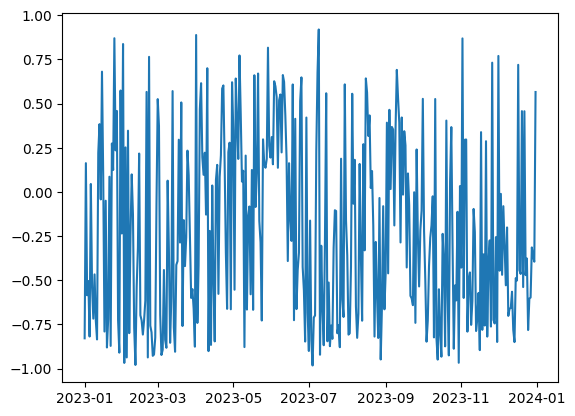

In [10]:
DE_solar = df_lite_train['DE_fossil brown coal/lignite']
DE_waste = df_lite_train['DE_wind onshore']
get_pair_daily_corr(DE_solar,DE_waste)

In [11]:
def quarter_corr(data):

    grouped = data.groupby(by = pd.Grouper(freq='Q'))
    corr_frames = []

    for _, quarter in grouped:
        
        corr = quarter.corr().loc[corrwith_cols, corr_cols]
        corr_frames.append(corr)

    return corr_frames

quarter_corr_matrix = quarter_corr(df_lite_train)

/var/folders/45/x735h0c55fjg4v6l76_cz4x40000gn/T/ipykernel_24671/49987827.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  grouped = data.groupby(by = pd.Grouper(freq='Q'))


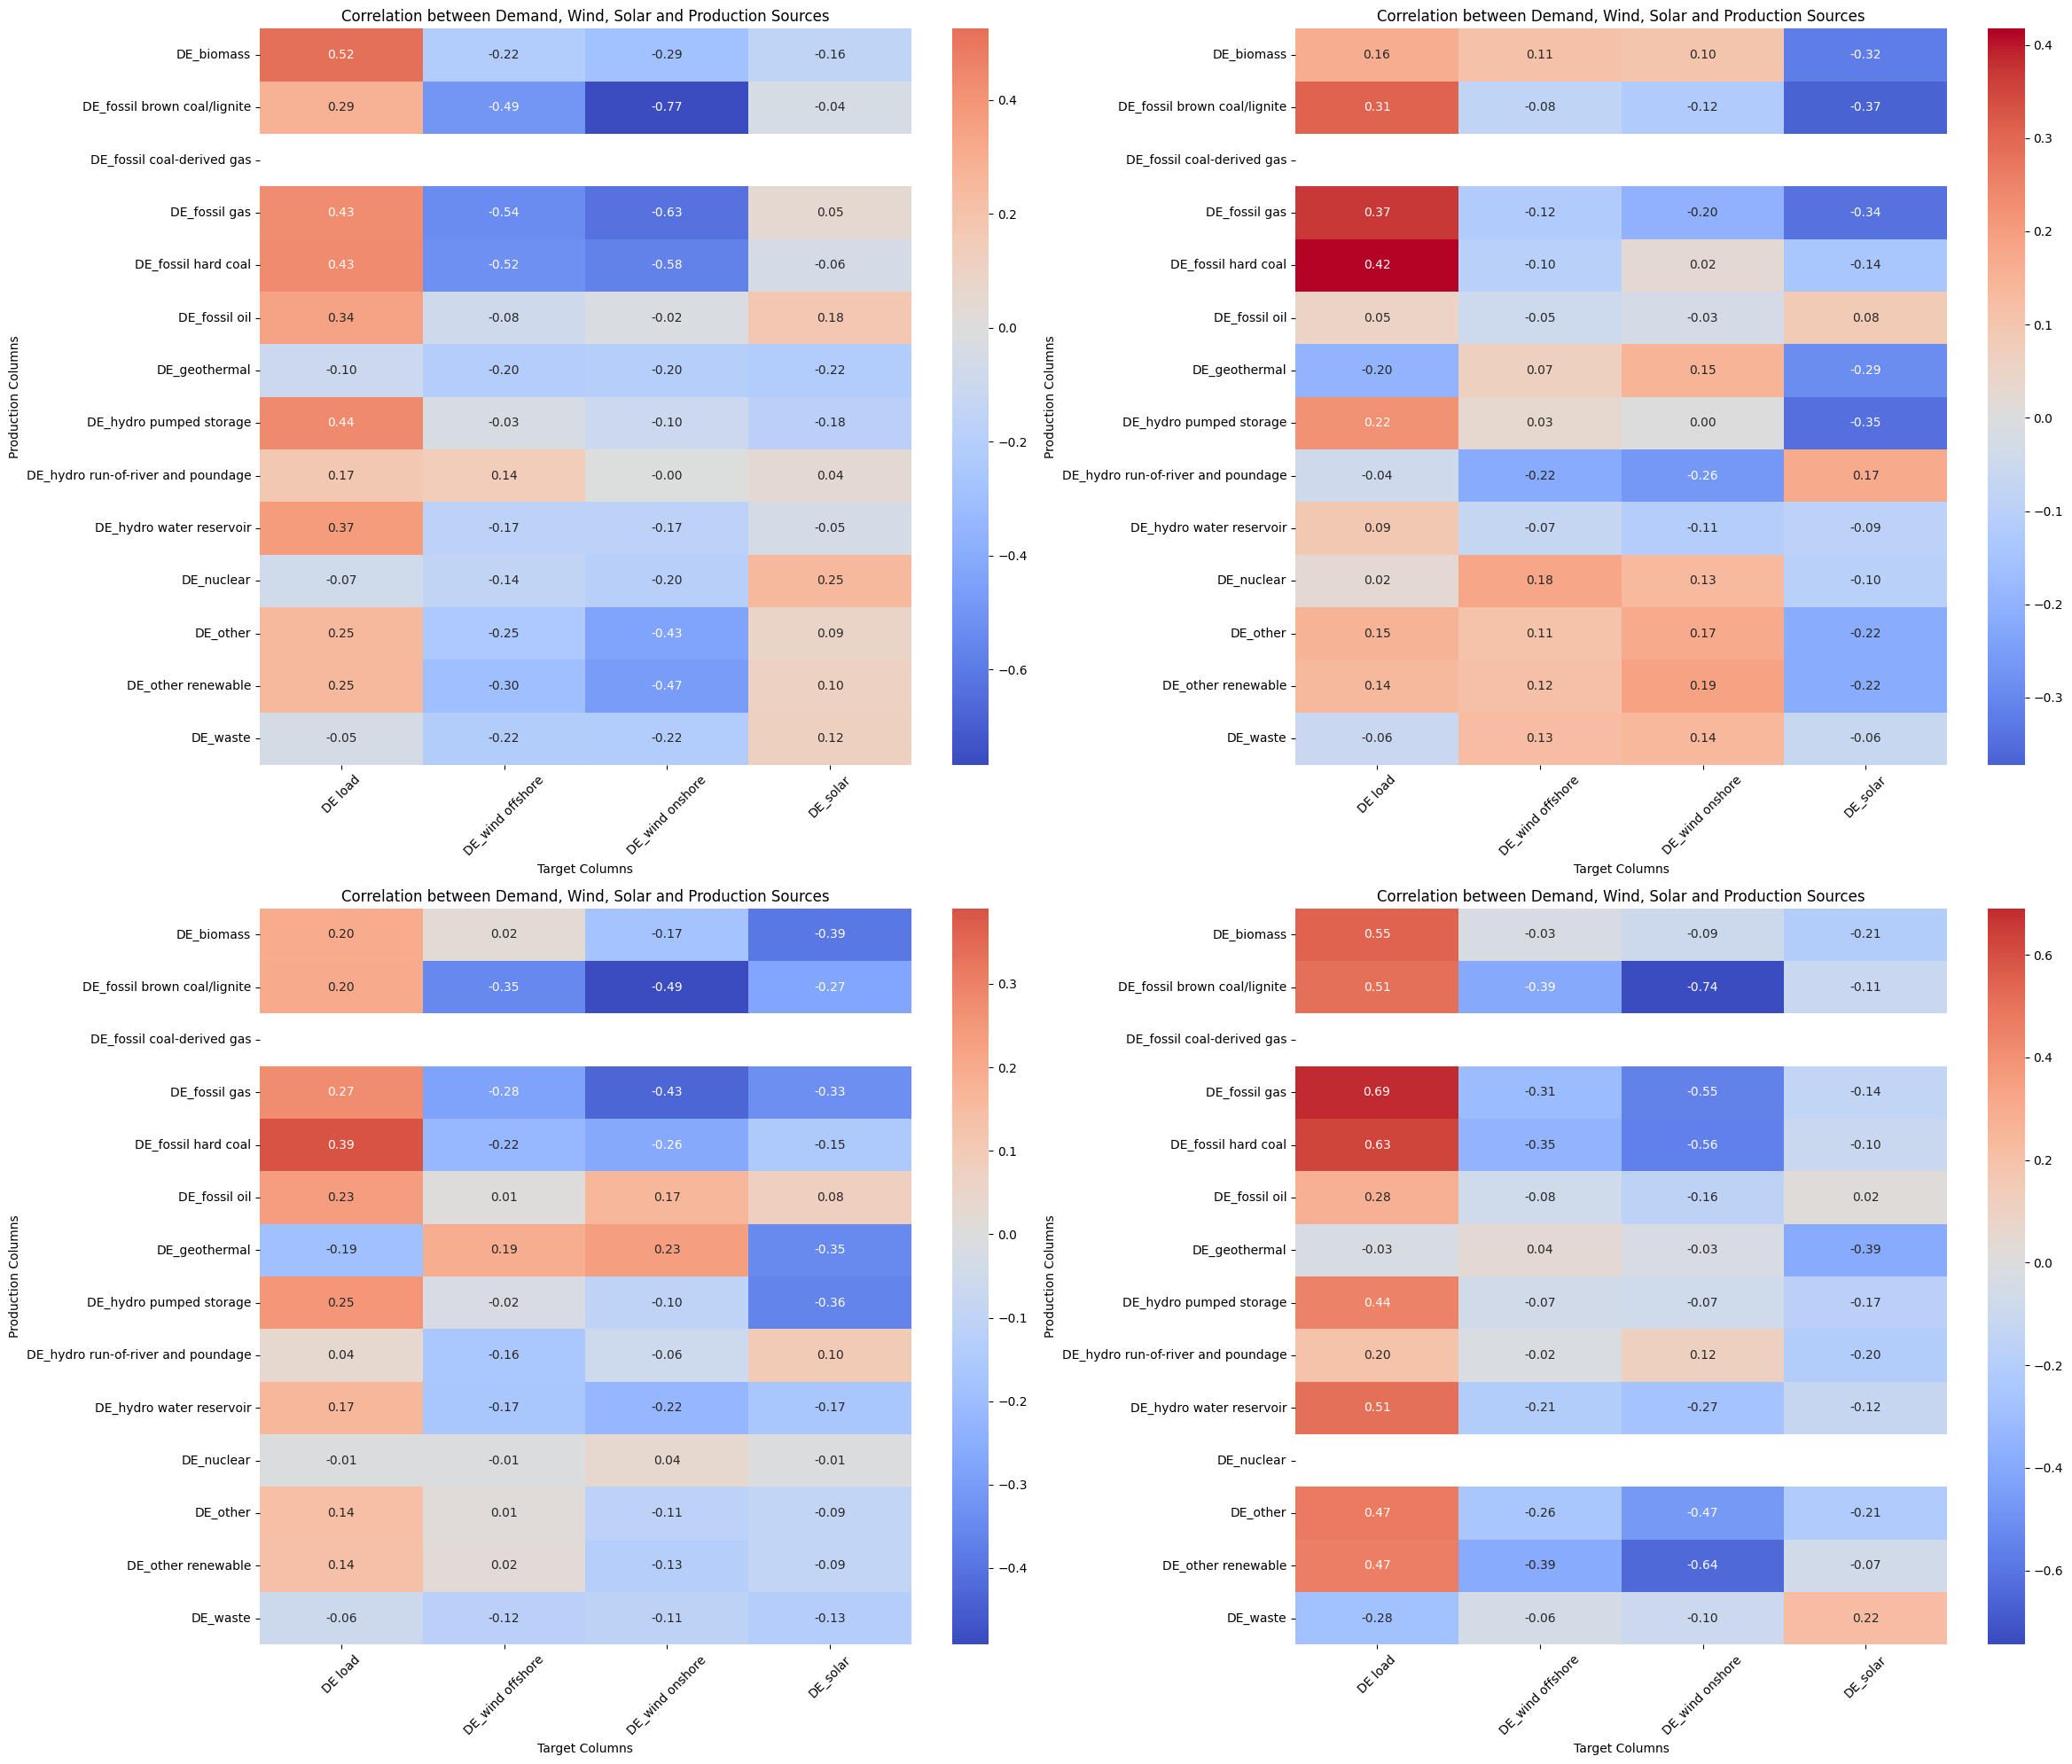

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 20))

for i in range(2):
    for j in range(2):
        sns.heatmap(quarter_corr_matrix[i*2 + j], annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=ax[i, j])
        
        ax[i, j].set_title("Correlation between Demand, Wind, Solar and Production Sources")
        ax[i, j].set_ylabel("Production Columns")
        ax[i, j].set_xlabel("Target Columns")
        ax[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


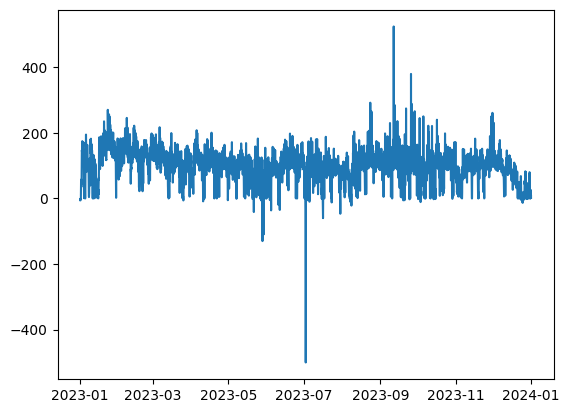

In [13]:
plt.plot(df_lite_train['DE-LU spot prices'])

In [14]:
# Q2

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [15]:
X, Y = df_lite_train.iloc[:, 5:-5], df_lite_train.iloc[:, -1]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.set_index(df_lite_train.index, inplace=True)

X_scaled = sm.add_constant(X)
model = sm.OLS(Y, X_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      DE-LU spot prices   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     2112.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        20:00:33   Log-Likelihood:                -38914.
No. Observations:                8759   AIC:                         7.787e+04
Df Residuals:                    8740   BIC:                         7.800e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [16]:
for i, col in enumerate(X.columns):
    print(f'{col} coeff: {model.params[i+1]:.3f}, p-val: {model.pvalues[i+1]:.3f}')

DE load coeff: 0.002, p-val: 0.000
DE_biomass coeff: 0.023, p-val: 0.000
DE_fossil brown coal/lignite coeff: 0.003, p-val: 0.000
DE_fossil coal-derived gas coeff: 0.000, p-val: 0.000
DE_fossil gas coeff: -0.001, p-val: 0.000
DE_fossil hard coal coeff: -0.000, p-val: 0.921
DE_fossil oil coeff: 0.012, p-val: 0.000
DE_geothermal coeff: -0.397, p-val: 0.000
DE_hydro pumped storage coeff: 0.003, p-val: 0.000
DE_hydro run-of-river and poundage coeff: -0.002, p-val: 0.251
DE_hydro water reservoir coeff: -0.010, p-val: 0.024
DE_nuclear coeff: 0.002, p-val: 0.000
DE_other coeff: -0.248, p-val: 0.000
DE_other renewable coeff: 0.374, p-val: 0.000
DE_solar coeff: -0.002, p-val: 0.000
DE_waste coeff: -0.010, p-val: 0.000
DE_wind offshore coeff: -0.002, p-val: 0.000
DE_wind onshore coeff: -0.002, p-val: 0.000
DE_hydro_pump_cons coeff: 0.002, p-val: 0.000


/var/folders/45/x735h0c55fjg4v6l76_cz4x40000gn/T/ipykernel_24671/2910067731.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{col} coeff: {model.params[i+1]:.3f}, p-val: {model.pvalues[i+1]:.3f}')


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your feature matrix
vif_data = pd.DataFrame()
vif_data["feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

print(vif_data[vif_data.VIF > 5])


                         feature          VIF
0                          const  1271.087780
1                        DE load     9.129668
2                     DE_biomass     7.304873
3   DE_fossil brown coal/lignite     6.519886
12                    DE_nuclear     5.286829
13                      DE_other     9.691702
14            DE_other renewable    10.353575
15                      DE_solar     7.474926
18               DE_wind onshore     6.783796


/Users/apple/Downloads/Imperial/Grey_Epoch_task/new_env/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


<Figure size 1000x400 with 0 Axes>

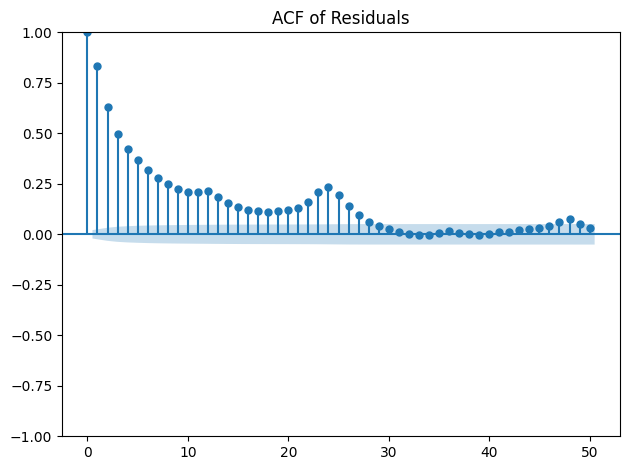

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming you have a fitted model from statsmodels
residuals = model.resid

# Plot the ACF
plt.figure(figsize=(10, 4))
plot_acf(residuals, lags=50)  # adjust lags as needed
plt.title("ACF of Residuals")
plt.tight_layout()
plt.show()

In [19]:
X_vars = ['DE load', 'DE_solar', 'DE_wind offshore', 'DE_wind onshore', 'DE-LU spot prices']
df_lite_train_model = df_lite_train[X_vars]
df_lite_train_model, y_model = df_lite_train_model.iloc[:, :-1], df_lite_train_model.iloc[:, -1]
df_lite_train_model = sm.add_constant(df_lite_train_model, has_constant='add')

model=sm.OLS(y_model, df_lite_train_model).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      DE-LU spot prices   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     6719.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        20:00:33   Log-Likelihood:                -40111.
No. Observations:                8759   AIC:                         8.023e+04
Df Residuals:                    8754   BIC:                         8.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -9.1991      1.499  

In [ ]:
#Benchmarking
myRMSE(model.predict(df_lite_train_model), y_model)

23.580228693192225

In [21]:
# Part 4

X_vars = ['DE load', 'DE_solar', 'DE_wind offshore', 'DE_wind onshore', 'DE_fossil brown coal/lignite', 'DE_fossil gas', 'DE_fossil hard coal', 'DE-LU spot prices']

X = df_lite_train.loc[:, X_vars]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.set_index(df_lite_train.index, inplace=True)
X_scaled = pd.concat((X_scaled, df_lite_train.iloc[:, :5]), axis = 1)
input_vars = ['DE load', 'DE_solar', 'DE_wind offshore', 'DE_wind onshore', 'quarter_number', 'month_number', 'week_number', 'day_number', 'hour', 'DE_fossil brown coal/lignite', 'DE_fossil gas', 'DE_fossil hard coal', 'DE-LU spot prices']
X_scaled=X_scaled.loc[:, input_vars]

train_set, val_set = train_test_split(X_scaled, test_size=0.2)

def spec_test_train(var):

    var_train, var_val = train_set.loc[:, var], val_set.loc[:, var]

    return var_train, var_val


gas_train, gas_test = spec_test_train('DE_fossil gas')
lignite_train, lignite_test = spec_test_train('DE_fossil brown coal/lignite')
coal_train, coal_test = spec_test_train('DE_fossil hard coal')


In [22]:
def get_comm_data(trainset, valset):

    X_train = trainset.iloc[:, :-4] # remove target variables
    X_test = valset.iloc[:, :-4] # remove target variables

    return X_train, X_test

lags=1

X_train_lignite, X_test_lignite = get_comm_data(train_set, val_set)
X_train_coal, X_test_coal = get_comm_data(train_set, val_set)
X_train_gas, X_test_gas = get_comm_data(train_set, val_set)

MSE RESULTS (XGBoost on Lignite):

0 lag = 1.345
1 lag = 0.614
3 lag = 0.946
10 lag = 0.865
24 lag = 0.917
50 lag = 1.0321
100 lag = 1.009
240 lag = 1.136

SHrinkage Results (on Lignite):

ENET (alpha 0.1, l1_ratio 0.1) = 1972.62
ENET (alpha 0.05, l1_ratio 0.1) = 1908.75
ENET (alpha 0.05, l1_ratio 0.05) = 1902.66
ENET (alpha 0.01, l1_ratio 0.01) = 1851.85
Lasso (alpha 0.01) = 1896.54
Lasso (alpha 0.1) = 2179.03
Ridge (alpha 0.1) = 1835.13
Ridge (alpha 0.01) = 1835.13
Ridge (alpha 1.0) = 1835.07

In [23]:
# Linear Regression

X_train_lignite_constant = sm.add_constant(X_train_lignite)
model_lignite = sm.OLS(lignite_train, X_train_lignite_constant).fit()
print(model_lignite.summary())

                                 OLS Regression Results                                 
Dep. Variable:     DE_fossil brown coal/lignite   R-squared:                       0.766
Model:                                      OLS   Adj. R-squared:                  0.766
Method:                           Least Squares   F-statistic:                     2551.
Date:                          Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                                  20:00:33   Log-Likelihood:                -4862.4
No. Observations:                          7007   AIC:                             9745.
Df Residuals:                              6997   BIC:                             9813.
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [24]:
X_test_lignite_constant = sm.add_constant(X_test_lignite, has_constant='add')
LR_lignite_pred = model_lignite.predict(X_test_lignite_constant)

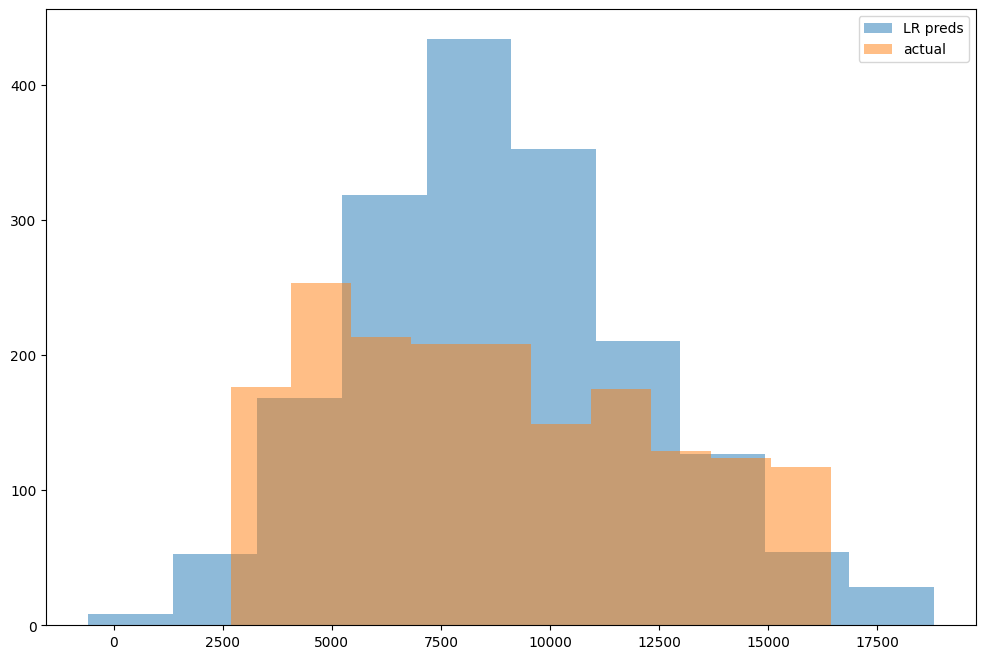

In [25]:
rescaled_LR_lignite = np.float64(LR_lignite_pred) * (scaler.var_[4] **0.5) + scaler.mean_[4]
rescaled_actual_lignite = lignite_test * (scaler.var_[4] **0.5) + scaler.mean_[4]

plt.figure(figsize=(12,8))
plt.hist( rescaled_LR_lignite, alpha=0.5, label = 'LR preds')
plt.hist(rescaled_actual_lignite, alpha = 0.5, label = 'actual')
plt.legend()

In [26]:
MSE_LR_lignite = myRMSE(rescaled_LR_lignite, rescaled_actual_lignite)
MSE_LR_lignite

1795.5287379719034

In [27]:
from sklearn.preprocessing import PolynomialFeatures

de_columns = ['DE load', 'DE_solar', 'DE_wind offshore', 'DE_wind onshore']

def get_poly_sets(set):

    X_de = set[de_columns]

    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_de_poly = poly.fit_transform(X_de)

    poly_feature_names = poly.get_feature_names_out(de_columns)
    X_de_poly_df = pd.DataFrame(X_de_poly, columns=poly_feature_names, index=X_de.index)

    X_poly = set.drop(columns=de_columns).copy()
    X_poly = pd.concat([X_poly, X_de_poly_df], axis=1)

    return X_poly

X_train_lignite_poly = get_poly_sets(X_train_lignite_constant)

model_lignite_poly = sm.OLS(lignite_train, X_train_lignite_poly).fit()
print(model_lignite_poly.summary())


                                 OLS Regression Results                                 
Dep. Variable:     DE_fossil brown coal/lignite   R-squared:                       0.781
Model:                                      OLS   Adj. R-squared:                  0.780
Method:                           Least Squares   F-statistic:                     1312.
Date:                          Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                                  20:00:34   Log-Likelihood:                -4636.0
No. Observations:                          7007   AIC:                             9312.
Df Residuals:                              6987   BIC:                             9449.
Df Model:                                    19                                         
Covariance Type:                      nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------

In [28]:
X_test_lignite_poly = get_poly_sets(X_test_lignite_constant)

LR_lignite_poly_pred = model_lignite_poly.predict(X_test_lignite_poly)

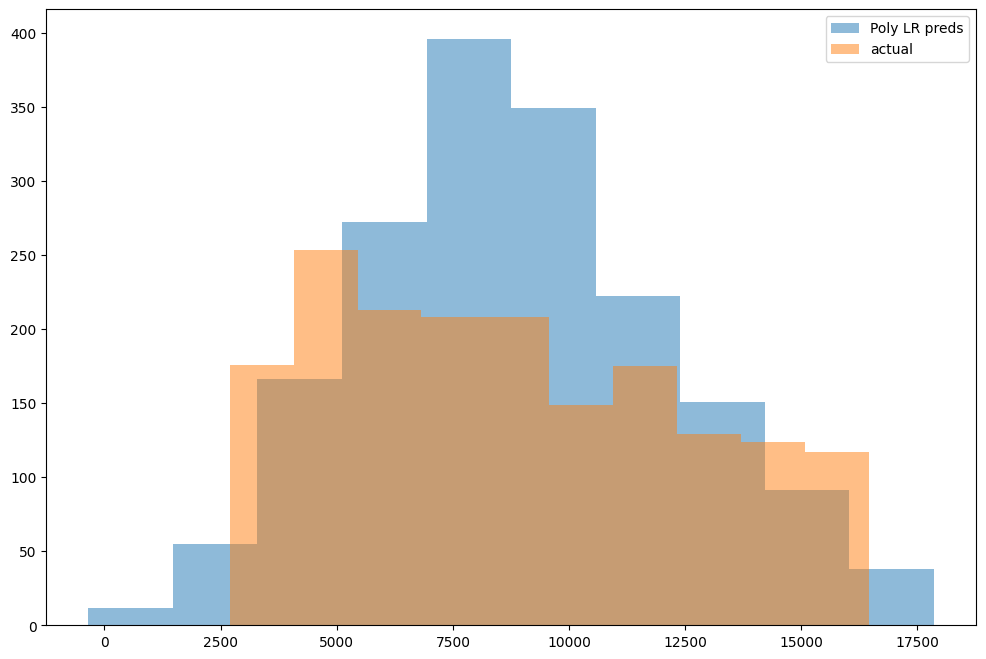

In [29]:
rescaled_LR_lignite_poly = np.float64(LR_lignite_poly_pred) * (scaler.var_[4] **0.5) + scaler.mean_[4]

plt.figure(figsize=(12,8))
plt.hist(rescaled_LR_lignite_poly, alpha=0.5, label = 'Poly LR preds')
plt.hist(rescaled_actual_lignite, alpha=0.5, label = 'actual')
plt.legend()

In [30]:
MSE_LR_Poly_lignite = myRMSE(rescaled_LR_lignite_poly, rescaled_actual_lignite)
MSE_LR_Poly_lignite

1741.9626878890215

In [31]:
X_train_coal_constant = sm.add_constant(X_train_coal)
model_coal = sm.OLS(coal_train, X_train_coal_constant).fit()
print(model_coal.summary())

                             OLS Regression Results                            
Dep. Variable:     DE_fossil hard coal   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.694
Method:                  Least Squares   F-statistic:                     1770.
Date:                 Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                         20:00:35   Log-Likelihood:                -5755.6
No. Observations:                 7007   AIC:                         1.153e+04
Df Residuals:                     6997   BIC:                         1.160e+04
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0060   

In [32]:
X_test_coal_constant = sm.add_constant(X_test_coal, has_constant='add')
LR_coal_pred = model_coal.predict(X_test_coal_constant)

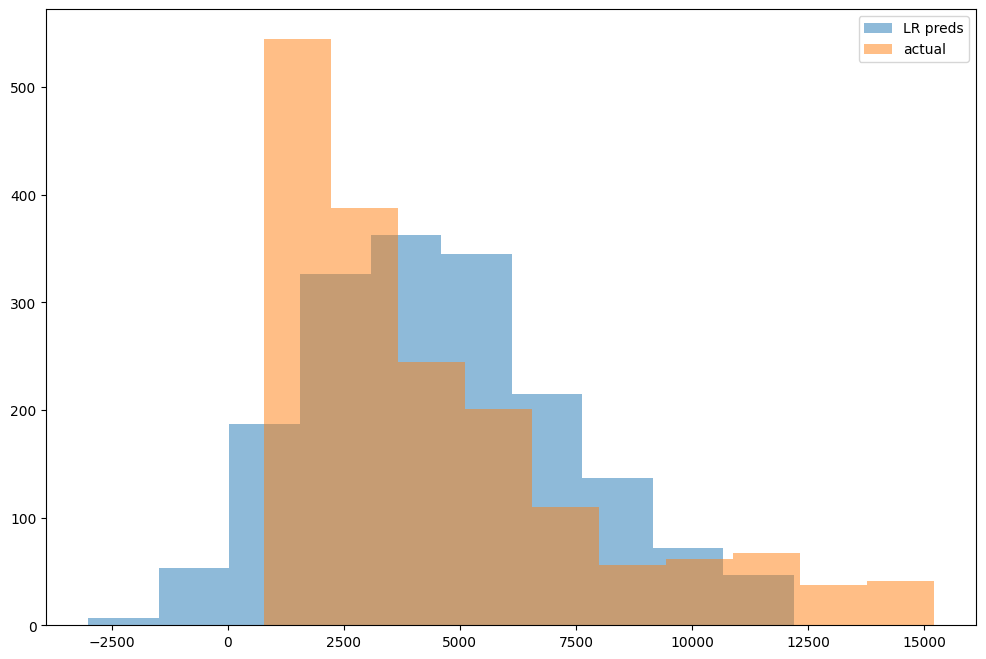

In [33]:
rescaled_LR_coal = np.float64(LR_coal_pred) * (scaler.var_[6] **0.5) + scaler.mean_[6]
rescaled_actual_coal = coal_test * (scaler.var_[6] **0.5) + scaler.mean_[6]

plt.figure(figsize=(12,8))
plt.hist(rescaled_LR_coal, alpha = 0.5, label = 'LR preds')
plt.hist(rescaled_actual_coal, alpha=0.5, label = 'actual')
plt.legend()

In [34]:
MSE_LR_coal = myRMSE(rescaled_LR_coal, rescaled_actual_coal)
MSE_LR_coal

1891.4284756970972

In [35]:
X_train_coal_poly = get_poly_sets(X_train_coal_constant)

model_coal_poly = sm.OLS(coal_train, X_train_coal_poly).fit()
print(model_coal_poly.summary())

                             OLS Regression Results                            
Dep. Variable:     DE_fossil hard coal   R-squared:                       0.750
Model:                             OLS   Adj. R-squared:                  0.750
Method:                  Least Squares   F-statistic:                     1104.
Date:                 Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                         20:00:35   Log-Likelihood:                -5054.0
No. Observations:                 7007   AIC:                         1.015e+04
Df Residuals:                     6987   BIC:                         1.029e+04
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [36]:
X_test_coal_poly = get_poly_sets(X_test_coal_constant)

LR_coal_poly_pred = model_coal_poly.predict(X_test_coal_poly)

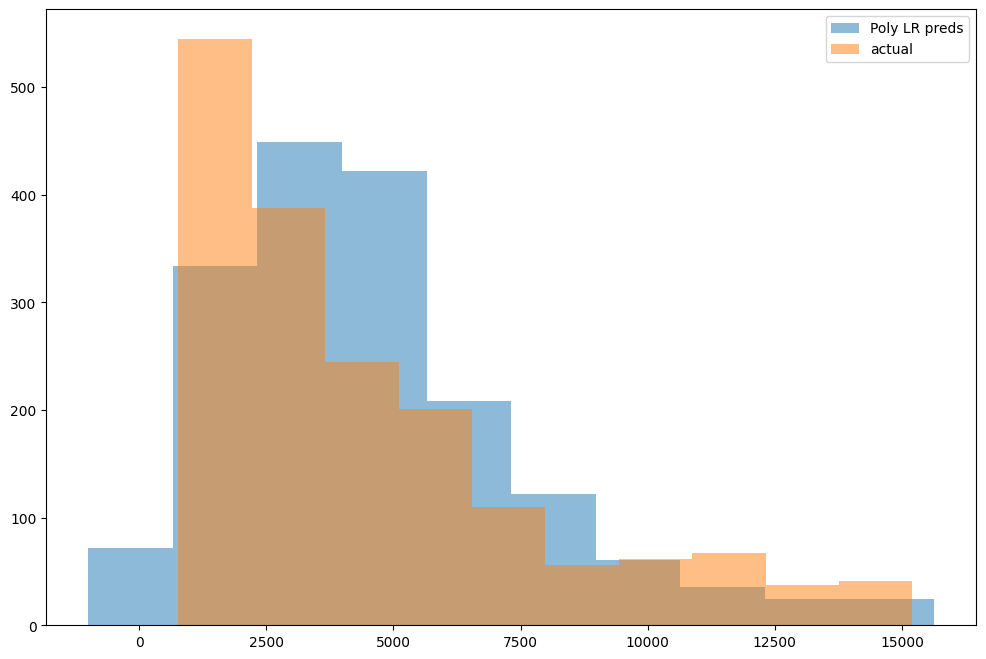

In [37]:
rescaled_LR_coal_poly = np.float64(LR_coal_poly_pred) * (scaler.var_[6] **0.5) + scaler.mean_[6]
rescaled_actual_coal = coal_test  * (scaler.var_[6] **0.5) + scaler.mean_[6] 

plt.figure(figsize=(12,8))
plt.hist(rescaled_LR_coal_poly, alpha = 0.5, label = 'Poly LR preds')
plt.hist(rescaled_actual_coal, alpha=0.5, label = 'actual')
plt.legend()

In [38]:
MSE_LR_Poly_coal = myRMSE(rescaled_LR_coal_poly, rescaled_actual_coal)
MSE_LR_Poly_coal

1690.0060855220129

In [39]:
X_train_gas_constant = sm.add_constant(X_train_gas)
model_gas = sm.OLS(gas_train, X_train_gas_constant).fit()
print(model_gas.summary())

X_test_gas_constant = sm.add_constant(X_test_gas, has_constant='add')
LR_gas_pred = model_gas.predict(X_test_gas_constant)

                            OLS Regression Results                            
Dep. Variable:          DE_fossil gas   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     2195.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        20:00:35   Log-Likelihood:                -5283.0
No. Observations:                7007   AIC:                         1.059e+04
Df Residuals:                    6997   BIC:                         1.065e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0032      0.006  

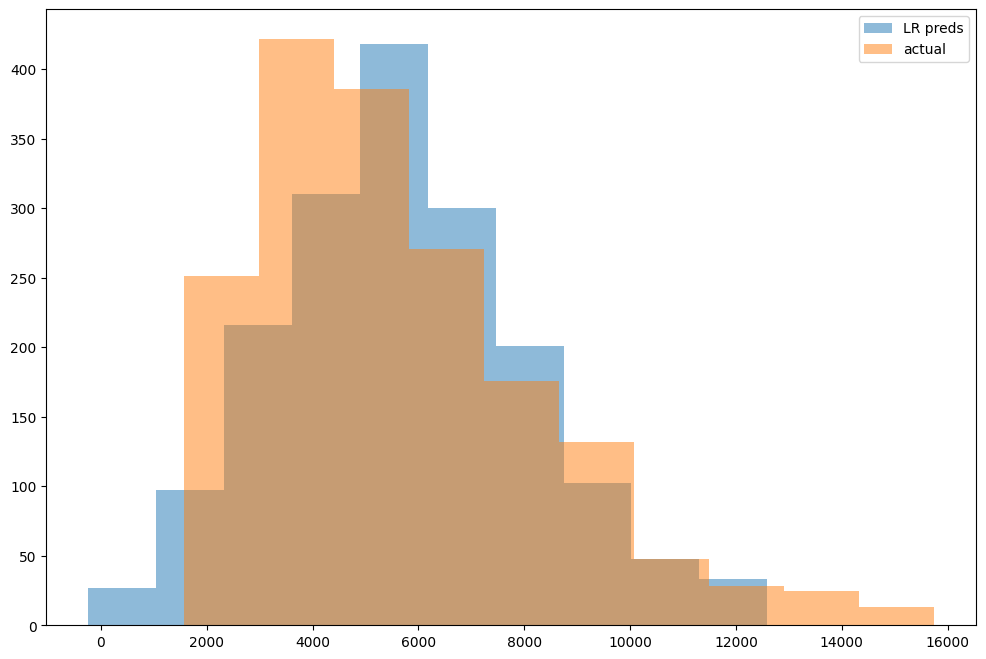

In [40]:
rescaled_LR_gas = np.float64(LR_gas_pred) * (scaler.var_[5] **0.5) + scaler.mean_[5]
rescaled_actual_gas = gas_test * (scaler.var_[5] **0.5) + scaler.mean_[5]

plt.figure(figsize=(12,8))
plt.hist(rescaled_LR_gas, alpha = 0.5, label = 'LR preds')
plt.hist(rescaled_actual_gas, alpha=0.5, label = 'actual')
plt.legend()

In [41]:
MSE_LR_gas = myRMSE(rescaled_LR_gas, rescaled_actual_gas)
MSE_LR_gas

1401.3089679218458

In [42]:
X_train_gas_poly = get_poly_sets(X_train_gas_constant)

model_gas_poly = sm.OLS(gas_train, X_train_gas_poly).fit()
print(model_gas_poly.summary())

                            OLS Regression Results                            
Dep. Variable:          DE_fossil gas   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     1277.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        20:00:36   Log-Likelihood:                -4733.0
No. Observations:                7007   AIC:                             9506.
Df Residuals:                    6987   BIC:                             9643.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

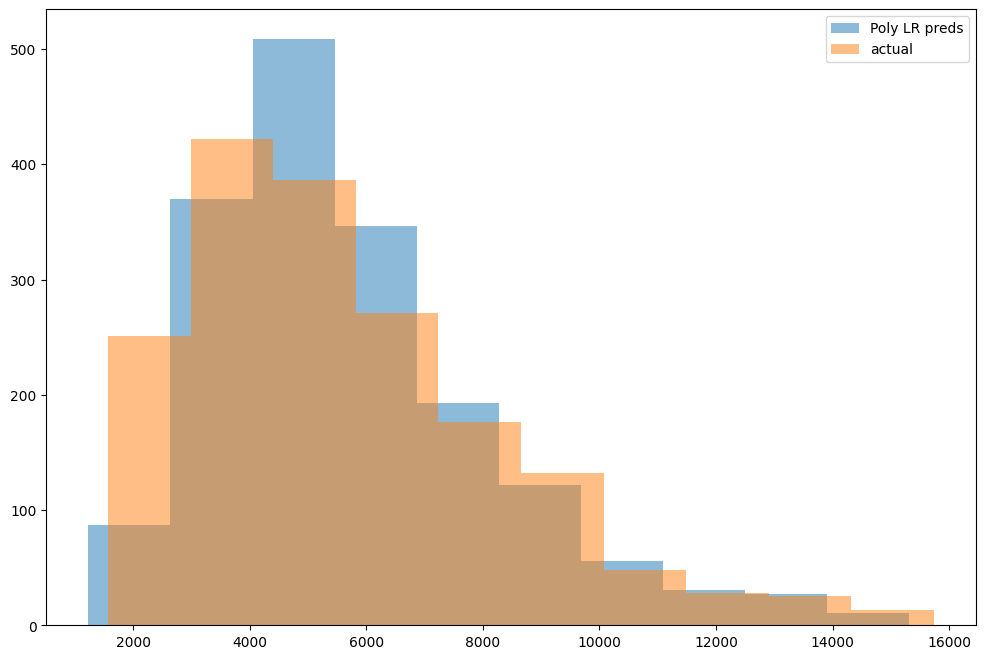

In [43]:
X_test_gas_poly = get_poly_sets(X_test_gas_constant)

LR_gas_poly_pred = model_gas_poly.predict(X_test_gas_poly)

rescaled_LR_gas_poly = np.float64(LR_gas_poly_pred) * (scaler.var_[5] **0.5) + scaler.mean_[5]
rescaled_actual_gas = gas_test  * (scaler.var_[5] **0.5) + scaler.mean_[5] 

plt.figure(figsize=(12,8))
plt.hist(rescaled_LR_gas_poly, alpha = 0.5, label = 'Poly LR preds')
plt.hist(rescaled_actual_gas, alpha=0.5, label = 'actual')
plt.legend()

In [44]:
MSE_LR_Poly_gas = myRMSE(rescaled_LR_gas_poly, rescaled_actual_gas)
MSE_LR_Poly_gas

1321.8205729157191

/Users/apple/Downloads/Imperial/Grey_Epoch_task/new_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:00:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "colsample_by_tree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


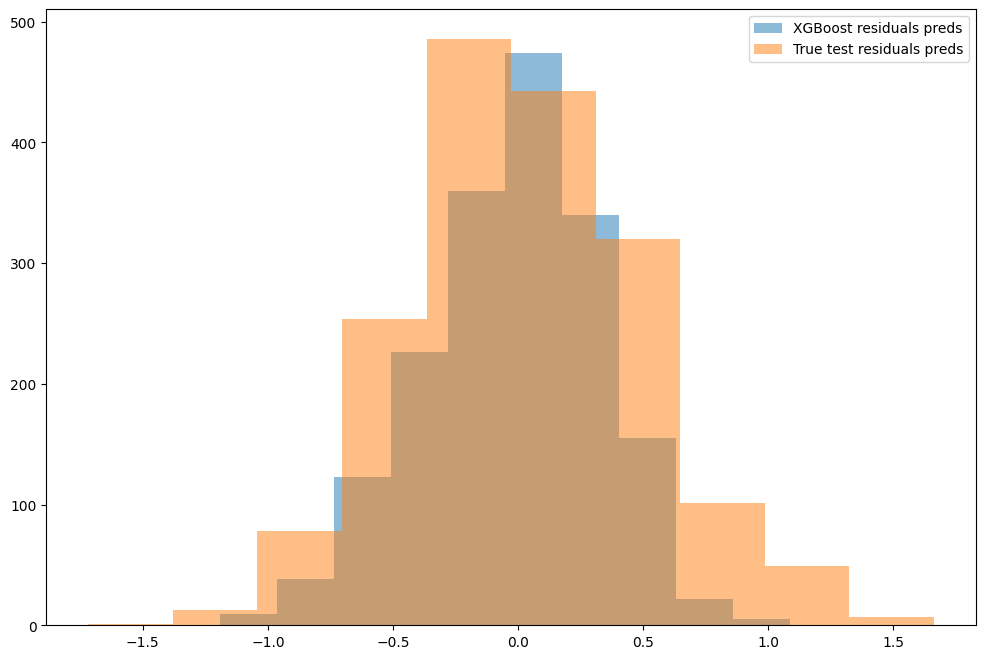

In [45]:
# XG Boost on residuals (Lignite)

from xgboost import XGBRegressor

LR_lignite_resid_train = model_lignite_poly.resid
LR_lignite_resid_test = LR_lignite_poly_pred - lignite_test

xgmodlignite = XGBRegressor(
    n_estimators = 100,
    colsample_by_tree = 0.8,
    subsample=0.8,
    learning_rate=0.1
)
xgmodlignite.fit(X_train_lignite, LR_lignite_resid_train)

#plt.plot(xgmodlignite.feature_importances_)

lignite_resid_xg_preds = xgmodlignite.predict(X_test_lignite)

plt.figure(figsize=(12,8))
plt.hist( lignite_resid_xg_preds, alpha = 0.5, label = 'XGBoost residuals preds')
plt.hist(LR_lignite_resid_test, alpha=  0.5, label = 'True test residuals preds')

plt.legend()

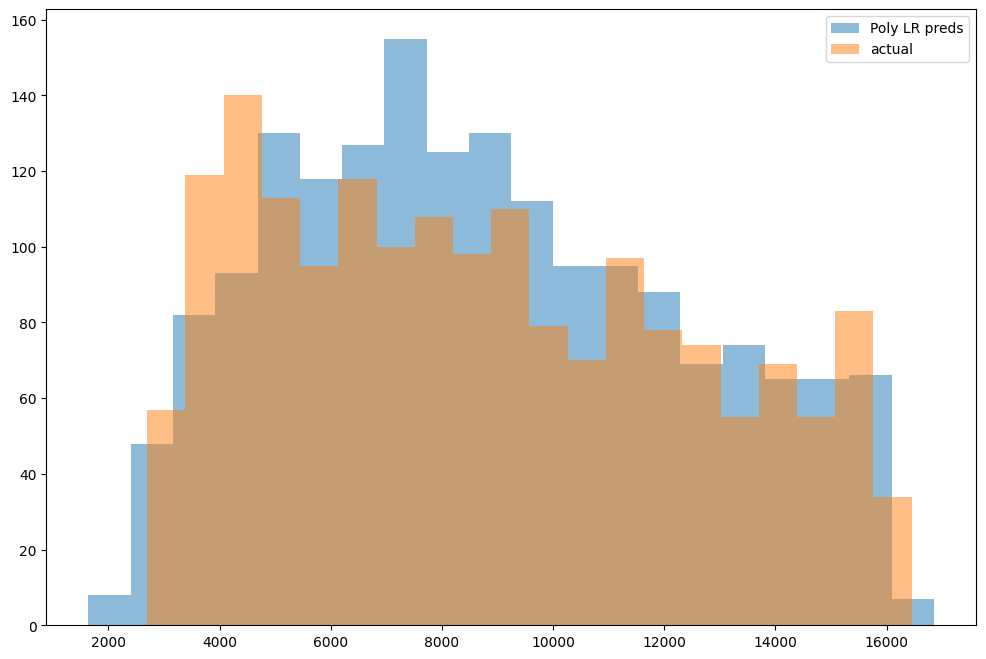

In [46]:
lignite_ensemble_preds = LR_lignite_poly_pred + lignite_resid_xg_preds
rescaled_lignite_ensemble_preds = lignite_ensemble_preds * (scaler.var_[4] **0.5) + scaler.mean_[4]

plt.figure(figsize=(12,8))
plt.hist(rescaled_lignite_ensemble_preds, alpha = 0.5,label = 'Poly LR preds', bins = 20)
plt.hist(rescaled_actual_lignite, alpha=0.5, label = 'actual', bins = 20)
plt.legend()

In [47]:
myRMSE(rescaled_lignite_ensemble_preds, rescaled_actual_lignite)

862.9804746016532

/Users/apple/Downloads/Imperial/Grey_Epoch_task/new_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:00:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "colsample_by_tree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


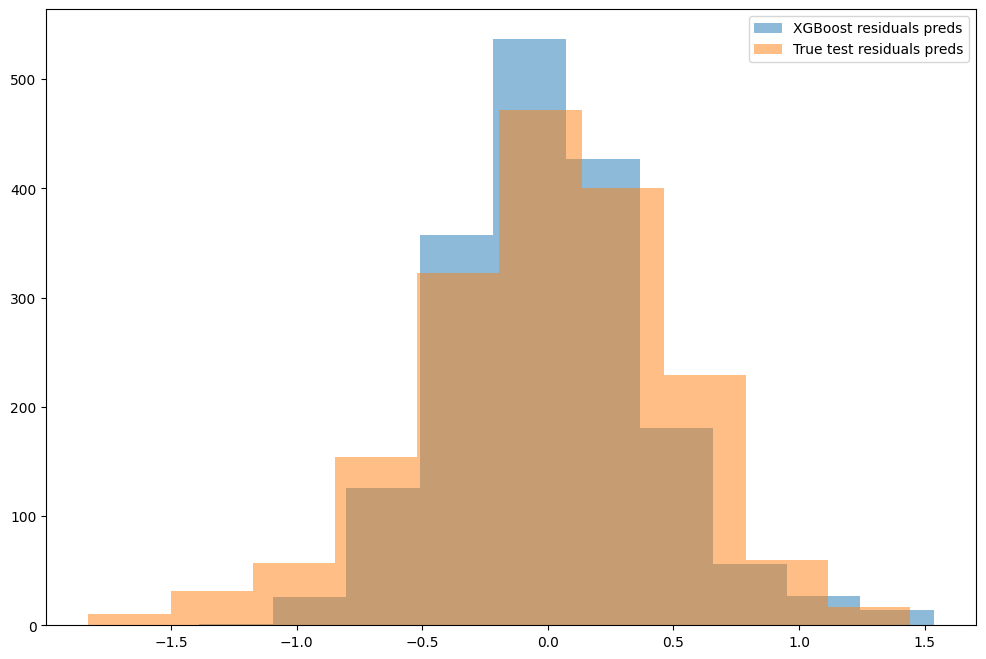

In [48]:
# XG Boost on residuals (Coal)

from xgboost import XGBRegressor

LR_coal_resid_train = model_coal_poly.resid
LR_coal_resid_test = LR_coal_poly_pred - coal_test

xgmodcoal = XGBRegressor(
    n_estimators = 100,
    colsample_by_tree = 0.8,
    subsample=0.8,
    learning_rate=0.1
)
xgmodcoal.fit(X_train_coal, LR_coal_resid_train)

#plt.plot(xgmodcoal.feature_importances_)

coal_resid_xg_preds = xgmodcoal.predict(X_test_coal)

plt.figure(figsize=(12,8))
plt.hist( coal_resid_xg_preds, alpha = 0.5, label = 'XGBoost residuals preds')
plt.hist(LR_coal_resid_test, alpha=  0.5, label = 'True test residuals preds')

plt.legend()

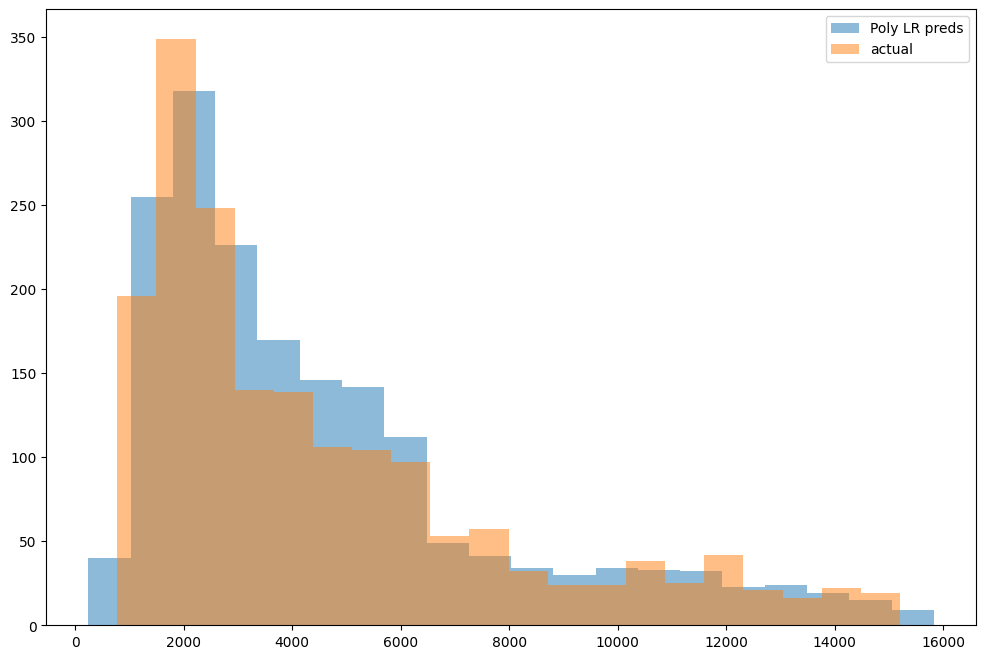

In [49]:
coal_ensemble_preds = LR_coal_poly_pred + coal_resid_xg_preds
rescaled_coal_ensemble_preds = coal_ensemble_preds * (scaler.var_[6] **0.5) + scaler.mean_[6]

plt.figure(figsize=(12,8))
plt.hist(rescaled_coal_ensemble_preds, alpha = 0.5,label = 'Poly LR preds', bins = 20)
plt.hist(rescaled_actual_coal, alpha=0.5, label = 'actual', bins = 20)
plt.legend()

In [50]:
myRMSE(rescaled_coal_ensemble_preds, rescaled_actual_coal)

743.9542540235606

/Users/apple/Downloads/Imperial/Grey_Epoch_task/new_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:00:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "colsample_by_tree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


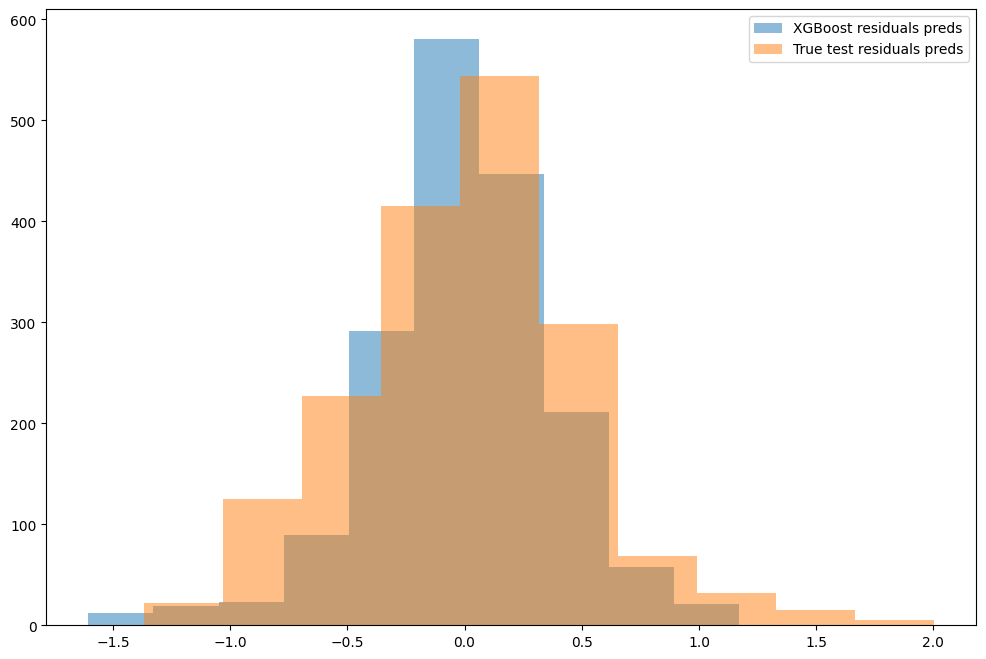

In [51]:
# XG Boost on residuals (gas)

from xgboost import XGBRegressor

LR_gas_resid_train = model_gas_poly.resid
LR_gas_resid_test = LR_gas_poly_pred - gas_test

xgmodgas = XGBRegressor(
    n_estimators = 100,
    colsample_by_tree = 0.8,
    subsample=0.8,
    learning_rate=0.1
)
xgmodgas.fit(X_train_gas, LR_gas_resid_train)

#plt.plot(xgmodgas.feature_importances_)

gas_resid_xg_preds = xgmodgas.predict(X_test_gas)

plt.figure(figsize=(12,8))
plt.hist( gas_resid_xg_preds, alpha = 0.5, label = 'XGBoost residuals preds')
plt.hist(LR_gas_resid_test, alpha=  0.5, label = 'True test residuals preds')

plt.legend()

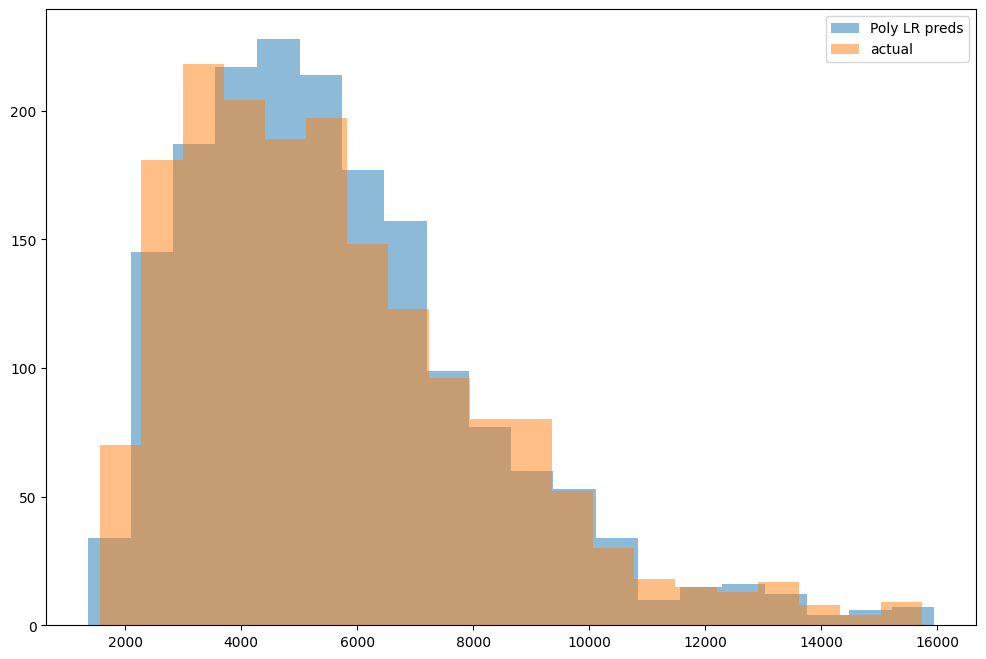

In [52]:
gas_ensemble_preds = LR_gas_poly_pred + gas_resid_xg_preds
rescaled_gas_ensemble_preds = gas_ensemble_preds * (scaler.var_[5] **0.5) + scaler.mean_[5]

plt.figure(figsize=(12,8))
plt.hist(rescaled_gas_ensemble_preds, alpha = 0.5,label = 'Poly LR preds', bins = 20)
plt.hist(rescaled_actual_gas, alpha=0.5, label = 'actual', bins = 20)
plt.legend()

In [53]:
myRMSE(rescaled_gas_ensemble_preds, rescaled_actual_gas)

610.3173930037127

In [54]:
### model selection for Power Pricing

# Getting data ready

train_set_power = train_set.iloc[:, :-1]
val_set_power = pd.concat((val_set.iloc[:, :-4], lignite_ensemble_preds, gas_ensemble_preds, coal_ensemble_preds), axis = 1) # SO I use my predictions boy
val_set_power.columns = list(val_set.columns[:-1])
spot_train, spot_test = spec_test_train('DE-LU spot prices')
spot_full = pd.concat((spot_train, spot_test))

full_set_power = pd.concat((train_set_power, val_set_power))

de_columns = ['DE load', 'DE_solar', 'DE_wind offshore', 'DE_wind onshore', 'DE_fossil brown coal/lignite', 'DE_fossil gas', 'DE_fossil hard coal']

full_set_power_poly = get_poly_sets(full_set_power)



In [55]:
from sklearn.model_selection import KFold

def cross_val_mse(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mses = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Add constant term for statsmodels
        X_train_const = sm.add_constant(X_train)
        X_val_const = sm.add_constant(X_val)

        model = sm.OLS(y_train, X_train_const).fit()
        preds = model.predict(X_val_const)

        preds_scaled = preds * (scaler.var_[-1] ** 0.5) + scaler.mean_[-1]
        y_scaled = y_val * (scaler.var_[-1] ** 0.5) + scaler.mean_[-1]
        mse = myRMSE(preds_scaled, y_scaled)
        mses.append(mse)

    return np.mean(mses)

MSE_LR_spot = cross_val_mse(full_set_power, spot_full)
MSE_LR_Poly_spot= cross_val_mse(full_set_power_poly, spot_full)

print(f'Linear Regression MSE: {MSE_LR_spot:.2f}')
print(f'Polynomial Regression MSE: {MSE_LR_Poly_spot:.2f}')


Linear Regression MSE: 22.35
Polynomial Regression MSE: 19.33


In [56]:
spot_full.sort_index()

datetime
2023-01-01 00:00:00   -2.109507
2023-01-01 01:00:00   -2.023324
2023-01-01 02:00:00   -2.031732
2023-01-01 03:00:00   -2.107615
2023-01-01 04:00:00   -2.095213
                         ...   
2023-12-31 19:00:00   -1.811651
2023-12-31 20:00:00   -1.833722
2023-12-31 21:00:00   -1.874712
2023-12-31 22:00:00   -1.776337
2023-12-31 23:00:00   -1.949544
Name: DE-LU spot prices, Length: 8759, dtype: float64

In [57]:
full_set_power_poly_constant = sm.add_constant(full_set_power_poly.sort_index())
spot_full = spot_full.sort_index()

model_spot_poly = sm.OLS(spot_full, full_set_power_poly_constant).fit()
print(model_spot_poly.summary())

                            OLS Regression Results                            
Dep. Variable:      DE-LU spot prices   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1103.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        20:00:40   Log-Likelihood:                -4537.2
No. Observations:                8759   AIC:                             9156.
Df Residuals:                    8718   BIC:                             9447.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

336


Text(0.5, 1.0, 'QQ-Plot')

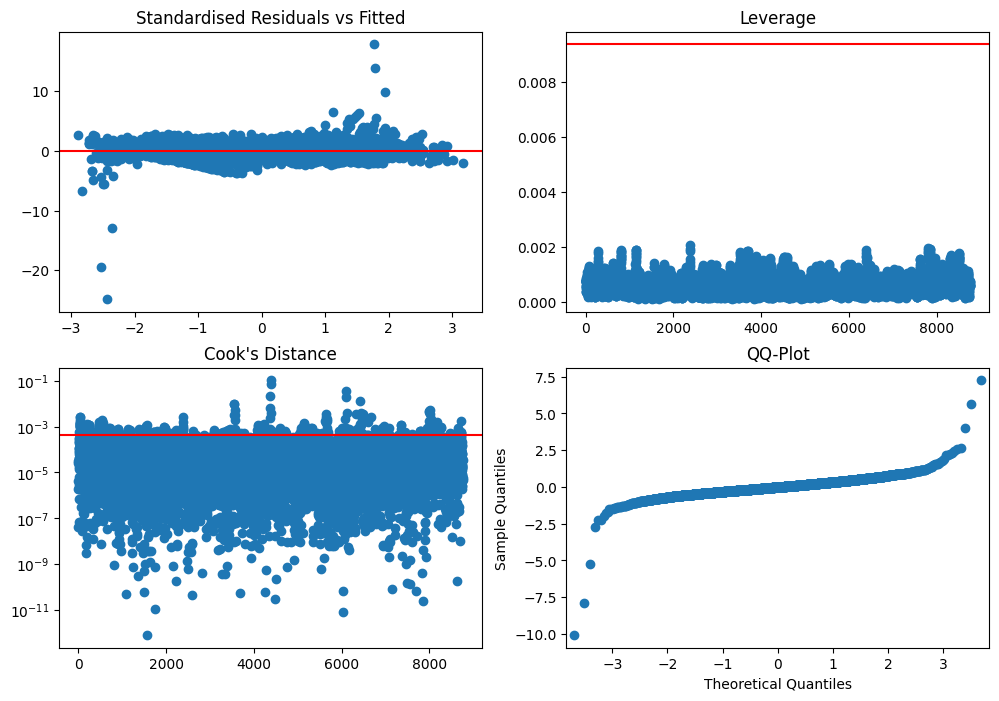

In [58]:
spot_model_standardised_residuals = model_spot_poly.get_influence().resid_studentized_internal
spot_model_leverage = model.get_influence().hat_matrix_diag
high_leverage_thresh = 2 * (model_spot_poly.df_model + 1) / len(full_set_power_poly_constant)
spot_model_influence = model_spot_poly.get_influence()
cooks_d = spot_model_influence.cooks_distance[0]
cooks_d_thresh = 4/ len(full_set_power_poly_constant)
print(np.sum(cooks_d>cooks_d_thresh))


fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12,8))

ax[0,0].plot(model_spot_poly.fittedvalues, spot_model_standardised_residuals, 'o')
ax[0,0].axhline(y = 0, color='red')
ax[0,0].set_title('Standardised Residuals vs Fitted')
ax[0,1].plot(spot_model_leverage, 'o')
ax[0,1].axhline(y = high_leverage_thresh, color='red')
ax[0,1].set_title('Leverage')
ax[1,0].plot(cooks_d, 'o')
ax[1,0].axhline(y = cooks_d_thresh, color='red')
ax[1,0].set_yscale('log')
ax[1,0].set_title("Cook's Distance")
sm.qqplot(model_spot_poly.resid, ax=ax[1,1])
ax[1,1].set_title("QQ-Plot")

In [59]:
mask = cooks_d < cooks_d_thresh

# Apply the mask to filter your dataset
full_set_filtered = full_set_power_poly_constant[mask]
spot_filtered = spot_full[mask]

In [60]:
MSE_LR_spot_filtered = cross_val_mse(full_set_filtered, spot_filtered)
print(f'Filtered Polynomial Regression MSE: {MSE_LR_spot_filtered:.4f}')

Filtered Polynomial Regression MSE: 14.6575


In [61]:
# Removing Features gives same perf, but lower degrees of freedom so will use (40 Df to 33)

model_spot_filtered = sm.OLS(spot_filtered, full_set_filtered).fit()
low_features = [feature for i, feature in enumerate(full_set_filtered.columns) if model_spot_filtered.pvalues[i] > 0.05]
MSE_LR_Poly_cleaned_spot = cross_val_mse(full_set_filtered.drop(columns=low_features), spot_filtered)
print(f'Simplified Polynomial Regression MSE: {MSE_LR_Poly_cleaned_spot:.4f}')

Simplified Polynomial Regression MSE: 14.6529


/var/folders/45/x735h0c55fjg4v6l76_cz4x40000gn/T/ipykernel_24671/3678861037.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  low_features = [feature for i, feature in enumerate(full_set_filtered.columns) if model_spot_filtered.pvalues[i] > 0.05]


In [62]:
train_set_power_constant, val_set_power_constant = train_test_split(pd.concat((full_set_filtered.sort_index().drop(columns=low_features), spot_filtered.sort_index()), axis=1), test_size = 0.2)
train_set_power_constant, spot_train = train_set_power_constant.iloc[:, :-1], train_set_power_constant.iloc[:, -1]
test_set_power_constant, spot_test = val_set_power_constant.iloc[:, :-1], val_set_power_constant.iloc[:, -1]

model_spot_poly_cleaned = sm.OLS(spot_train, train_set_power_constant).fit()
print(model_spot_poly_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:      DE-LU spot prices   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1552.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        20:00:41   Log-Likelihood:                -1607.7
No. Observations:                6738   AIC:                             3285.
Df Residuals:                    6703   BIC:                             3524.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [63]:
LR_spot_poly_cleaned_pred = model_spot_poly_cleaned.predict(test_set_power_constant)

/Users/apple/Downloads/Imperial/Grey_Epoch_task/new_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:00:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "colsample_by_tree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


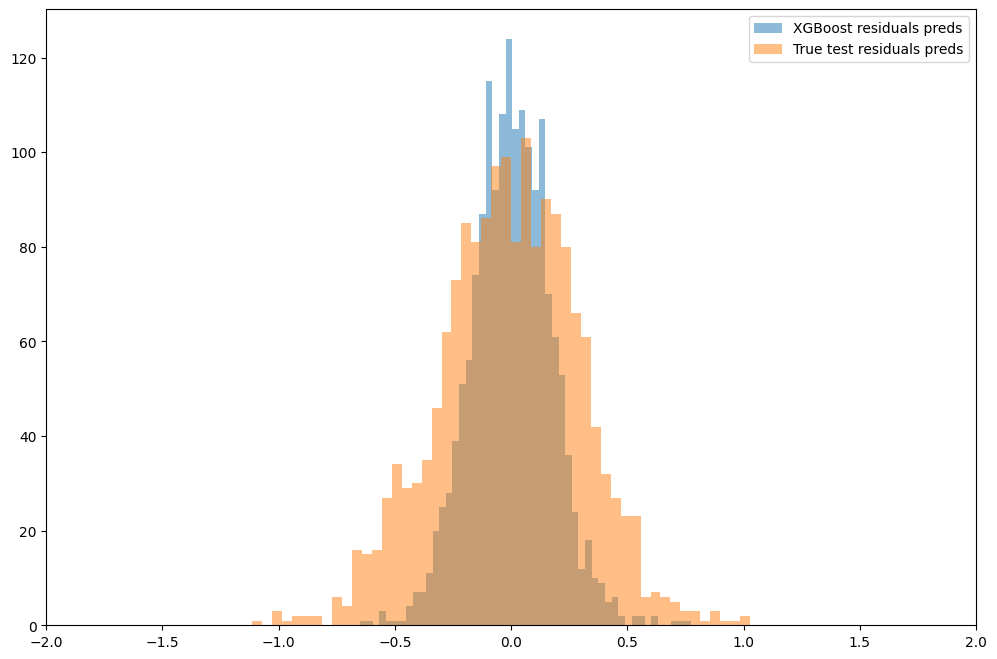

In [64]:
from xgboost import XGBRegressor

LR_spot_resid_train = model_spot_poly_cleaned.resid
LR_spot_resid_test = LR_spot_poly_cleaned_pred - spot_test

xgmodgas = XGBRegressor(
    n_estimators = 100,
    colsample_by_tree = 0.8,
    subsample=0.8,
    learning_rate=0.1
)
xgmodgas.fit(train_set_power_constant, LR_spot_resid_train)

#plt.plot(xgmodgas.feature_importances_)

spot_resid_xg_preds = xgmodgas.predict(test_set_power_constant)

plt.figure(figsize=(12,8))
plt.hist(spot_resid_xg_preds, alpha = 0.5, label = 'XGBoost residuals preds', bins=50)
plt.hist(LR_spot_resid_test, alpha=  0.5, label = 'True test residuals preds', bins=50)
plt.xlim((-2, 2))

plt.legend()

10.236615846425012

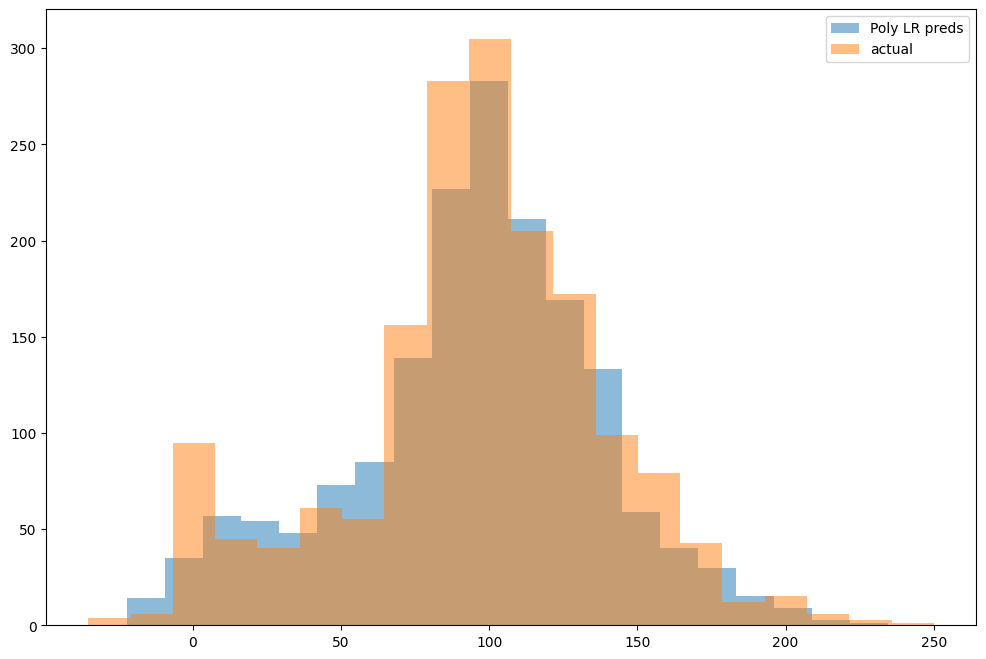

In [80]:
spot_ensemble_preds = LR_spot_poly_cleaned_pred + spot_resid_xg_preds
rescaled_spot_ensemble_preds = spot_ensemble_preds * (scaler.var_[-1] **0.5) + scaler.mean_[-1]
rescaled_actual_spot = spot_test * (scaler.var_[-1] **0.5) + scaler.mean_[-1]

plt.figure(figsize=(12,8))
plt.hist(rescaled_spot_ensemble_preds, alpha = 0.5,label = 'Poly LR preds', bins = 20)
plt.hist(rescaled_actual_spot, alpha=0.5, label = 'actual', bins = 20)
plt.legend()

myRMSE(rescaled_spot_ensemble_preds, rescaled_actual_spot)

In [85]:
(10.24 - 23.58)/23.58

-0.5657336726039016

In [66]:
# Example of forecast (last 3 months)

example_set_power = full_set_filtered.sort_index().loc['2023-10-01':, :]
spot_example = spot_filtered.sort_index()['2023-10-01':]

example_set_power_constant = sm.add_constant(example_set_power)

LR_spot_poly_cleaned_pred_example = model_spot_poly_cleaned.predict(example_set_power_constant.drop(columns=low_features))
LR_spot_resid_example = xgmodgas.predict(example_set_power_constant.drop(columns=low_features))
LR_spot_ensemble_pred_example = LR_spot_poly_cleaned_pred_example + LR_spot_resid_example

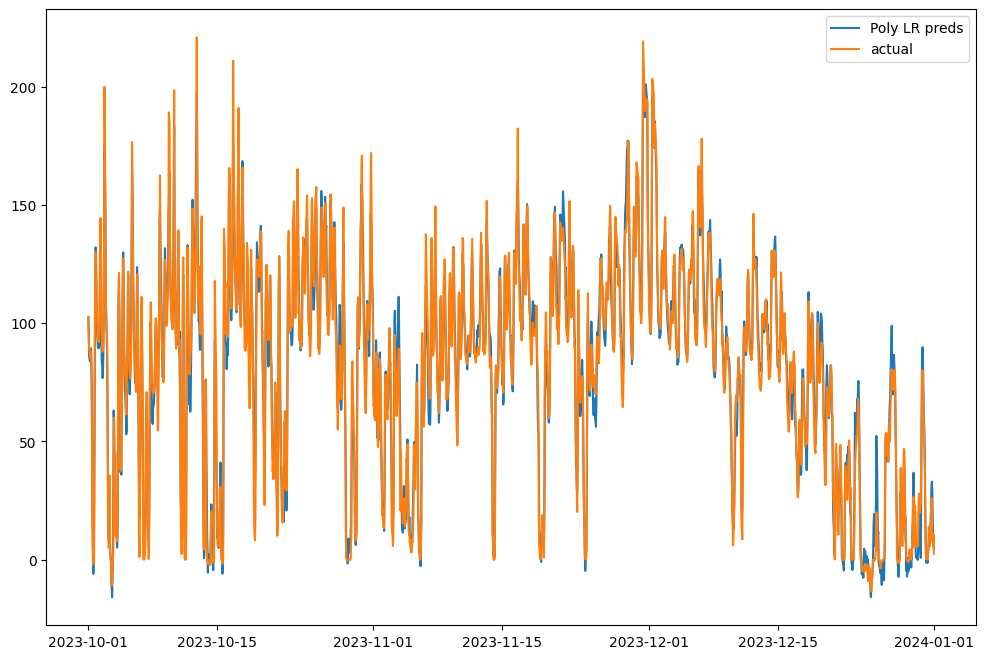

In [67]:
rescaled_LR_spot_poly_example = np.float64(LR_spot_ensemble_pred_example) * (scaler.var_[-1] **0.5) + scaler.mean_[-1]
rescaled_actual_spot_example = spot_example  * (scaler.var_[-1] **0.5) + scaler.mean_[-1] 

plt.figure(figsize=(12,8))
plt.plot(rescaled_actual_spot_example.index, rescaled_LR_spot_poly_example, label = 'Poly LR preds')
plt.plot(rescaled_actual_spot_example, label = 'actual')
plt.legend()

In [68]:
myRMSE(rescaled_actual_spot_example, rescaled_LR_spot_poly_example)

8.22104197091217

In [69]:
### Putting it all together now

# Prepping the Data
df_model = df_lite[input_vars]
df_model_scaled = pd.DataFrame(scaler.fit_transform(df_model[X_vars]), columns = X_vars, index=df_model.index)
df_train = pd.concat((df_model_scaled.loc[:'2023-12-31', :].iloc[:, :-4], df_model.loc[:'2023-12-31',:].iloc[:, 4:9]), axis = 1)
df_test = pd.concat((df_model_scaled.loc['2024-01-01':, :].iloc[:, :-4], df_model.loc['2024-01-01':,:].iloc[:, 4:9]), axis = 1)

de_columns = ['DE load', 'DE_solar', 'DE_wind offshore', 'DE_wind onshore']
df_train_poly = get_poly_sets(df_train)
df_test_poly = get_poly_sets(df_test)

df_train_poly = sm.add_constant(df_train_poly, has_constant='add')
df_test_poly = sm.add_constant(df_test_poly, has_constant='add')

lignite_train = df_model_scaled.loc[:'2023-12-31', 'DE_fossil brown coal/lignite']
coal_train = df_model_scaled.loc[:'2023-12-31', 'DE_fossil hard coal']
gas_train = df_model_scaled.loc[:'2023-12-31', 'DE_fossil gas']
spot_train = df_model_scaled.loc[:'2023-12-31', 'DE-LU spot prices']

In [70]:
# Lignite

model_lignite = sm.OLS(lignite_train, df_train_poly).fit()
model_lignite_resid = model_lignite.resid

xgmodlignite = XGBRegressor(
    n_estimators = 100,
    colsample_by_tree = 0.8,
    subsample=0.8,
    learning_rate=0.1
)
xgmodlignite.fit(df_train_poly, model_lignite_resid)

LR_lignite_pred = model_lignite.predict(df_test_poly)
XG_lignite_pred = xgmodlignite.predict(df_test_poly)
lignite_pred = LR_lignite_pred + XG_lignite_pred

#plt.plot(df_train_poly.index, lignite_pred, label = 'pred')
#plt.plot(lignite_train, label='actual')
#plt.legend()

/Users/apple/Downloads/Imperial/Grey_Epoch_task/new_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:00:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "colsample_by_tree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [71]:
# gas

model_gas = sm.OLS(gas_train, df_train_poly).fit()
model_gas_resid = model_gas.resid

xgmodgas = XGBRegressor(
    n_estimators = 100,
    colsample_by_tree = 0.8,
    subsample=0.8,
    learning_rate=0.1
)
xgmodgas.fit(df_train_poly, model_gas_resid)

LR_gas_pred = model_gas.predict(df_test_poly)
XG_gas_pred = xgmodgas.predict(df_test_poly)
gas_pred = LR_gas_pred + XG_gas_pred

#plt.plot(df_train_poly.index, gas_pred, label = 'pred')
#plt.plot(gas_train, label='actual')
#plt.legend()

/Users/apple/Downloads/Imperial/Grey_Epoch_task/new_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "colsample_by_tree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [72]:
# coal

model_coal = sm.OLS(coal_train, df_train_poly).fit()
model_coal_resid = model_coal.resid

xgmodcoal = XGBRegressor(
    n_estimators = 100,
    colsample_by_tree = 0.8,
    subsample=0.8,
    learning_rate=0.1
)
xgmodcoal.fit(df_train_poly, model_coal_resid)

LR_coal_pred = model_coal.predict(df_test_poly)
XG_coal_pred = xgmodcoal.predict(df_test_poly)
coal_pred = LR_coal_pred + XG_coal_pred

#plt.plot(df_train_poly.index, coal_pred, label = 'pred')
#plt.plot(coal_train, label='actual')
#plt.legend()

/Users/apple/Downloads/Imperial/Grey_Epoch_task/new_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "colsample_by_tree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [73]:
df_train_full = pd.concat((df_train, lignite_train, gas_train, coal_train), axis=1)
df_train_full.columns = list(df_train.columns) + ['DE_fossil brown coal/lignite', 'DE_fossil gas', 'DE_fossil hard coal']

df_test_full = pd.concat((df_test, lignite_pred, gas_pred, coal_pred), axis=1)
df_test_full.columns = list(df_test.columns) + ['DE_fossil brown coal/lignite', 'DE_fossil gas', 'DE_fossil hard coal']

# Polynomial terms
de_columns = ['DE load', 'DE_solar', 'DE_wind offshore', 'DE_wind onshore', 'DE_fossil brown coal/lignite', 'DE_fossil gas', 'DE_fossil hard coal']
df_train_full_poly = get_poly_sets(df_train_full)
df_test_full_poly = get_poly_sets(df_test_full)

df_train_full_poly = sm.add_constant(df_train_full_poly, has_constant='add')
df_test_full_poly = sm.add_constant(df_test_full_poly, has_constant='add')

# Removing high Cook's Distance points, and features

df_train_filtered = df_train_full_poly[mask].drop(columns = low_features)
df_test_filtered = df_test_full_poly.drop(columns = low_features)
spot_filtered = spot_train[mask]

In [74]:
model_spot = sm.OLS(spot_filtered, df_train_filtered).fit()
print(model_spot.summary())

                            OLS Regression Results                            
Dep. Variable:      DE-LU spot prices   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1951.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        20:00:46   Log-Likelihood:                -2011.8
No. Observations:                8423   AIC:                             4094.
Df Residuals:                    8388   BIC:                             4340.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [75]:
model_spot_resid = model_spot.resid

xgmodspot = XGBRegressor(
    n_estimators = 100,
    colsample_by_tree = 0.8,
    subsample=0.8,
    learning_rate=0.1
)
xgmodspot.fit(df_train_filtered, model_spot_resid)


/Users/apple/Downloads/Imperial/Grey_Epoch_task/new_env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [20:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "colsample_by_tree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_by_tree=0.8, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None, ...)

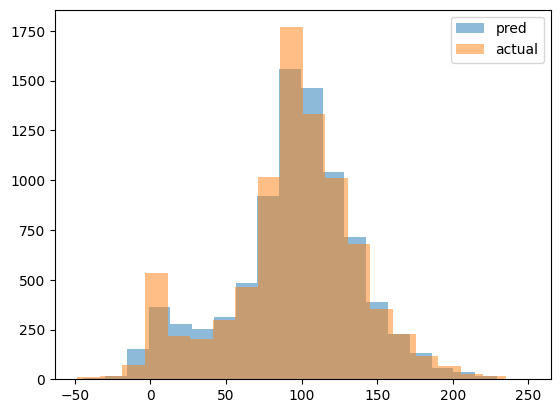

In [76]:
LR_spot_pred = model_spot.predict(df_train_filtered)
XG_spot_pred = xgmodspot.predict(df_train_filtered)
spot_pred = LR_spot_pred + XG_spot_pred

rescaled_spot_pred = spot_pred * (scaler.var_[-1] ** 0.5) + scaler.mean_[-1]
rescaled_spot_filtered = spot_filtered * (scaler.var_[-1] ** 0.5) + scaler.mean_[-1]

plt.hist(rescaled_spot_pred, alpha = 0.5, label = 'pred', bins = 20)
plt.hist(rescaled_spot_filtered, alpha = 0.5, label='actual', bins = 20)
plt.legend()

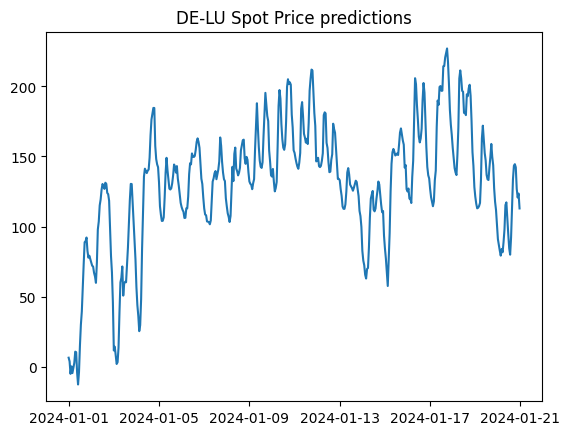

In [77]:
LR_spot_pred_test = model_spot.predict(df_test_filtered)
XG_spot_pred_test = xgmodspot.predict(df_test_filtered)
spot_pred_test = LR_spot_pred_test + XG_spot_pred_test

rescaled_spot_pred_test = spot_pred_test * (scaler.var_[-1] ** 0.5) + scaler.mean_[-1]
plt.plot(df_test_full.index, rescaled_spot_pred_test)
plt.title('DE-LU Spot Price predictions')
plt.savefig('DE-LU Price Prediction')


In [78]:
rescaled_spot_pred_test

datetime
2024-01-01 00:00:00      6.363665
2024-01-01 01:00:00      3.716759
2024-01-01 02:00:00     -5.173944
2024-01-01 03:00:00      0.176485
2024-01-01 04:00:00     -4.613438
                          ...    
2024-01-20 19:00:00    142.272428
2024-01-20 20:00:00    126.930640
2024-01-20 21:00:00    120.674766
2024-01-20 22:00:00    123.520219
2024-01-20 23:00:00    112.914836
Length: 480, dtype: float64